<a href="https://colab.research.google.com/github/manish257/American-Sign-Language-Detection/blob/main/asl_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pathlib
data_dir=pathlib.Path("/content/drive/MyDrive/Machine_Learning_Projects/Dataset/American Sign Language/asl_alphabet_dataset/asl_alphabet_train")

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

6000


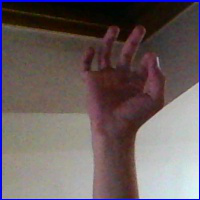

In [ ]:
f = list(data_dir.glob('f/*'))
PIL.Image.open(str(f[8]))

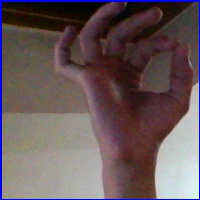

In [ ]:

PIL.Image.open(str(f[13]))

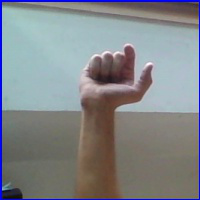

In [ ]:
non_f = list(data_dir.glob('non_f/*'))
PIL.Image.open(str(non_f[8]))

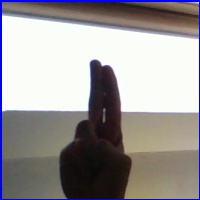

In [ ]:

PIL.Image.open(str(non_f[80]))

In [ ]:
#loading by use of keras.preprocessing

#defining some parameters for loaders

batch_size=64
img_height= 200
img_width= 200

In [ ]:
#using 80% images for training and 20% images for validation

train_ds= tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed= 123,
    image_size=(img_height,img_width),
    batch_size=batch_size)

Found 6000 files belonging to 2 classes.
Using 4800 files for training.


In [ ]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 6000 files belonging to 2 classes.
Using 1200 files for validation.


In [ ]:
#names of classes in dataset in alphabetcial order

class_names=train_ds.class_names
print(class_names)

['f', 'non_f']


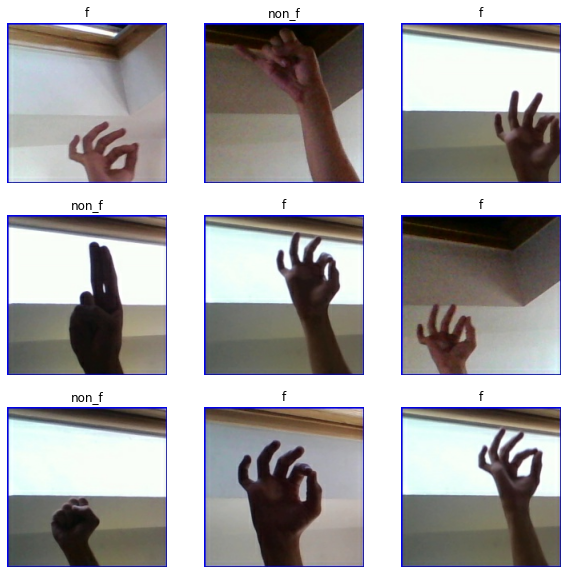

In [ ]:
#visualizing the data

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax= plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 200, 200, 3)
(64,)


In [ ]:
#configuring dataset for performance

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#creating the model
#The model consists of three convolution blocks with a max pool layer in each of them. There's a fully connected layer with
# 128 units on top of it that is activated by a relu activation function.
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

In [ ]:
#compile the model
#choose the optimizers.Adam optimizer and losses.SparseCategoricalCrossentropy loss function. To view training and validation 
#accuracy for each training epoch, pass the metrics argument.

model.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [ ]:
#model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 64)       

In [ ]:
#training the model using callback for better accuracy

callback= tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=0,
    mode="auto",
    baseline= None,
    restore_best_weights=True
)
epochs=15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[callback]
)

Epoch 1/15
75/75 [==============================] - 13s 73ms/step - loss: 0.4801 - accuracy: 0.7498 - val_loss: 0.2088 - val_accuracy: 0.9250
Epoch 2/15
75/75 [==============================] - 4s 47ms/step - loss: 0.1727 - accuracy: 0.9287 - val_loss: 0.1146 - val_accuracy: 0.9592
Epoch 3/15
75/75 [==============================] - 3s 46ms/step - loss: 0.0897 - accuracy: 0.9654 - val_loss: 0.0785 - val_accuracy: 0.9700
Epoch 4/15
75/75 [==============================] - 3s 46ms/step - loss: 0.0480 - accuracy: 0.9817 - val_loss: 0.1024 - val_accuracy: 0.9650
Epoch 5/15
75/75 [==============================] - 3s 46ms/step - loss: 0.0328 - accuracy: 0.9887 - val_loss: 0.0661 - val_accuracy: 0.9792
Epoch 6/15
75/75 [==============================] - 3s 46ms/step - loss: 0.0192 - accuracy: 0.9935 - val_loss: 0.0647 - val_accuracy: 0.9858
Epoch 7/15
75/75 [==============================] - 3s 46ms/step - loss: 0.0167 - accuracy: 0.9940 - val_loss: 0.0429 - val_accuracy: 0.9908
Epoch 8/15
7

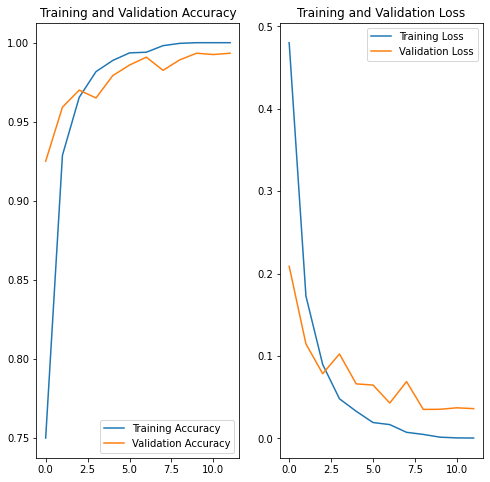

In [ ]:
#visualizing training results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(12)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#predict on new data

test_data = "/content/drive/MyDrive/Machine_Learning_Projects/Dataset/American Sign Language/asl_alphabet_dataset/asl_alphabet_test/f/F_test.jpg"


img = keras.preprocessing.image.load_img(
    test_data, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to f with a 100.00 percent confidence.
